# Plant Disease Detection System for Sustainable Agriculture

## Importing Important Libraries

In [1]:
import zipfile
import os

## Locating Zip File Path

In [3]:
zip_file_path = "archive.zip"
extract_data = "/Image_Data"

## Checking for existance of zip file of dataset

In [4]:
if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
            zip_ref.extractall(extract_data)
        print(f"Successfully Extracted '{zip_file_path}' to '{extract_data}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file")
    except Exception as e:
        print(f"An error occured: {e}")
else:
    print(f"Error : '{zip_file_path}' does not exist")

Successfully Extracted 'archive.zip' to '/Image_Data'


## Importing other libraries for operations

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import glob as gb
import glob
import tensorflow as tf

In [6]:
train = "train"

## Preprocessing Train Data Using Image Data Generator

In [7]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                     batch_size=32,
                     subset="training",
                     color_mode='rgb',
                     class_mode='categorical',
                     shuffle=True)

Found 63282 images belonging to 38 classes.


In [8]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

## Visualizing Images of Leaves fron Training Dataset

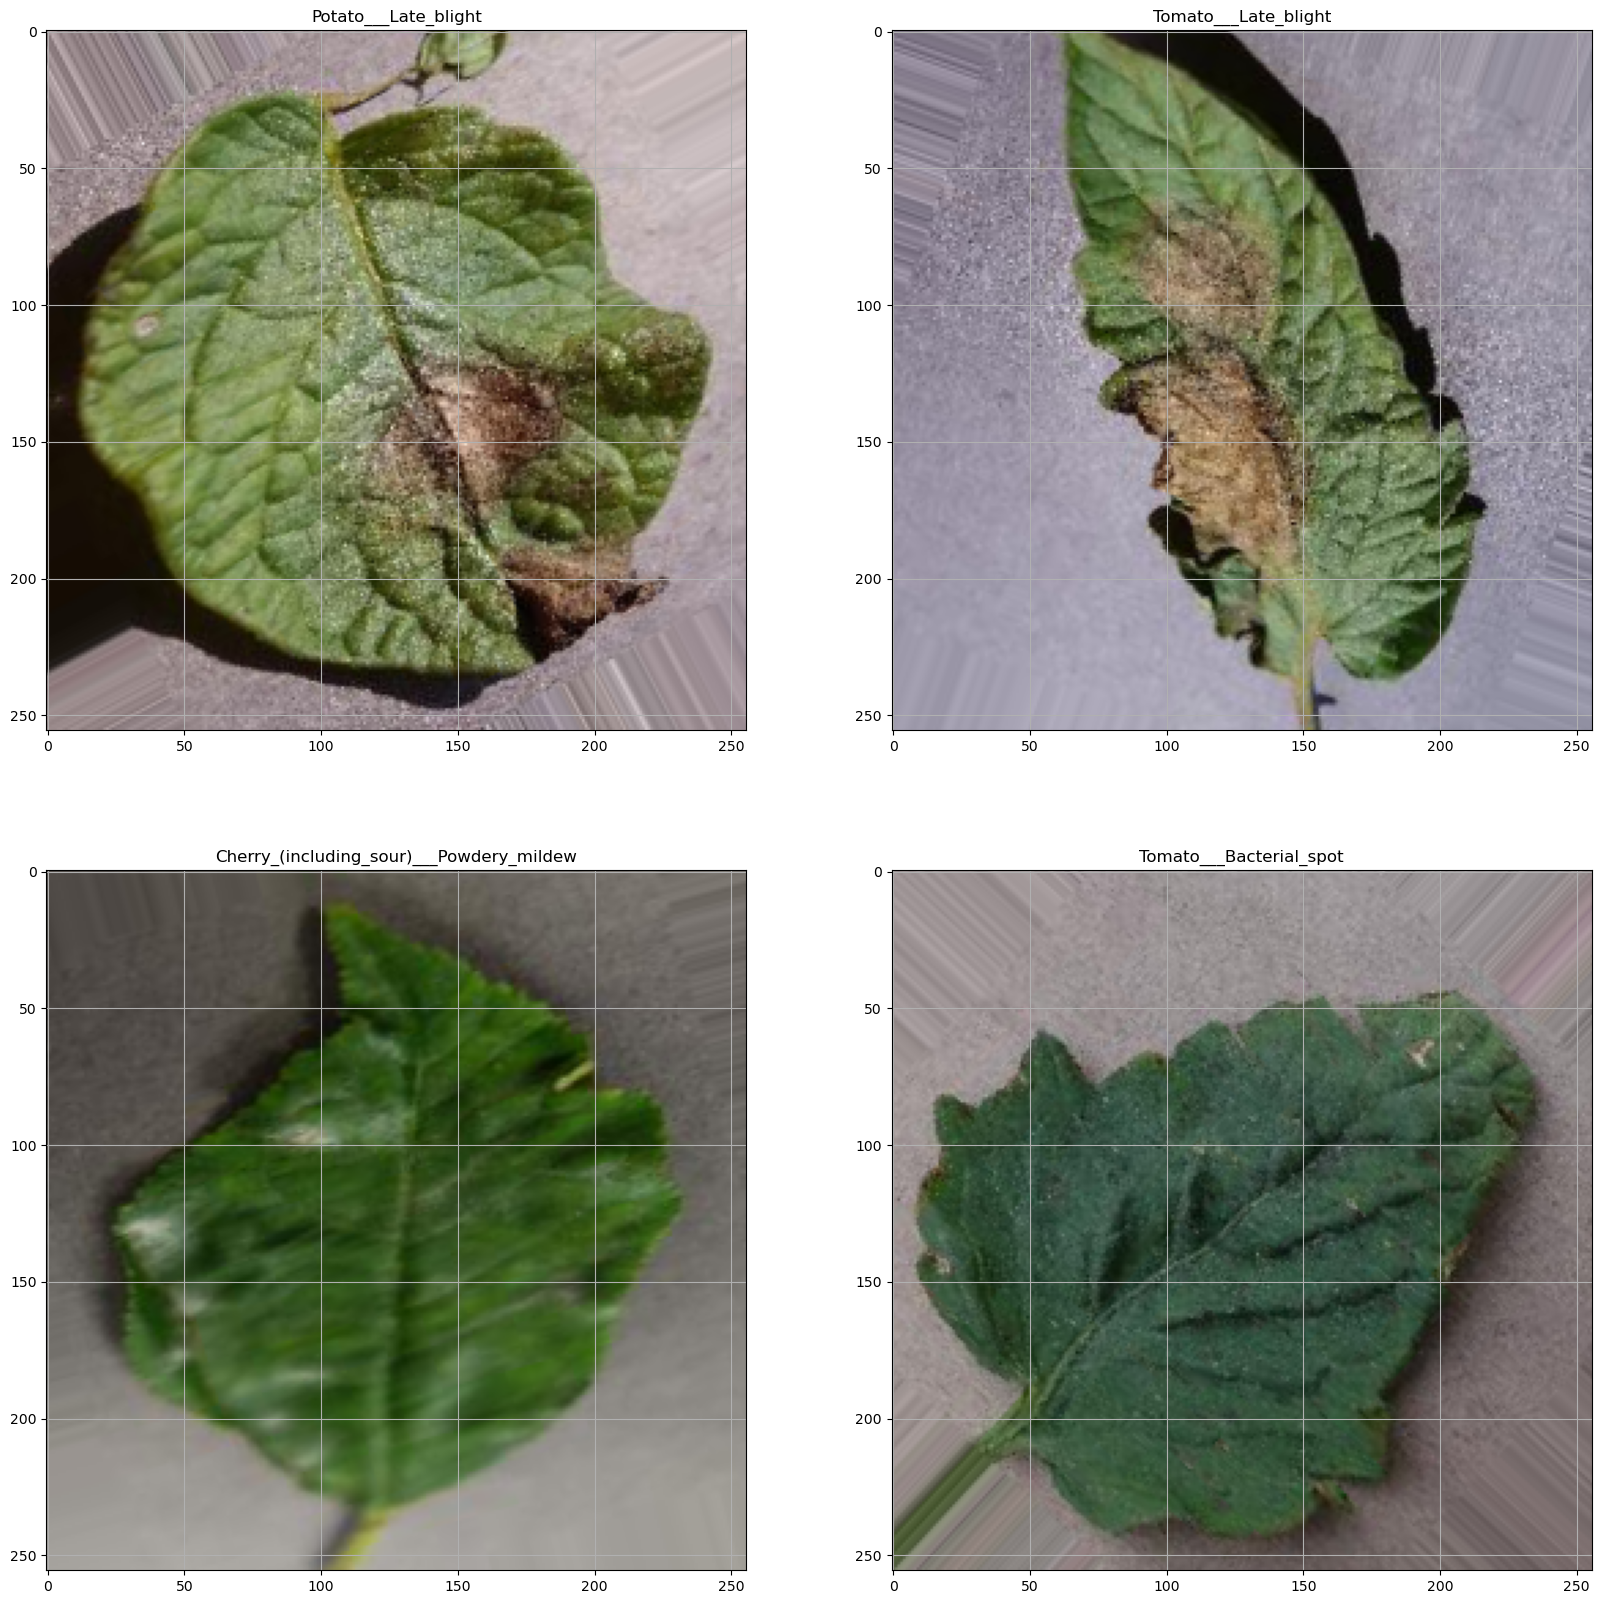

In [9]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show
    break

## Preprocessing Valid data

In [10]:
valid = "valid"

In [11]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(224,224),
    subset='validation',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1742 images belonging to 38 classes.


In [12]:
test = "test"

## Preprocessing Test Data

In [13]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.0,
    preprocessing_function=None,
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 33 images belonging to 1 classes.


In [14]:
test_generator.class_indices

{'test': 0}

## Model Building

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # First Convolution Layer Followed by Max Polling Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # Second Convolution Layer Followed by Max Polling Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Third Convolution Layer Followed by Max Polling Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # First Dense Layer
    Dense(128, activation='relu'),
    # Second Dense Layer
    Dense(64, activation='relu'),
    # Third Dense Layer
    Dense(48, activation='relu'),
    # Dropout Layer to Prevent Overfitting
    Dropout(0.2),
    # Output Layer
    Dense(38, activation='softmax')
])


c:\Users\VDKulkarni\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compilation

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         1,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,852,214 (56.66 MB)

 Trainable params: 14,852,214 (56.66 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    batch_size=48
)

Epoch 1/10


c:\Users\VDKulkarni\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1978/1978 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2993 - loss: 2.4850

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 115200, but received input with shape (None, 86528)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

## Saving Model using .h5 extension

In [21]:
model.save('my_cnn_model.h5')
print("Model saved as 'my_cnn_model.h5'")

Model saved as 'my_cnn_model.h5'


In [23]:
class_labels = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## Checking Accuracy

In [30]:
from sklearn.metrics import classification_report, accuracy_score


test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.0,
    preprocessing_function=None,
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(256,256),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 1000:.2f}%")

Found 33 images belonging to 1 classes.


c:\Users\VDKulkarni\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Test Accuracy: 30.30%
